### Importing the Libraries

In [211]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Reading the Dataset

In [212]:
directory = "./Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name, 0)
        dataset.append([image, label])

random.shuffle(dataset)

### Creating x & y

In [213]:
x = []
y = []

for image, label in dataset:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)

### Function for Generating Label

In [214]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

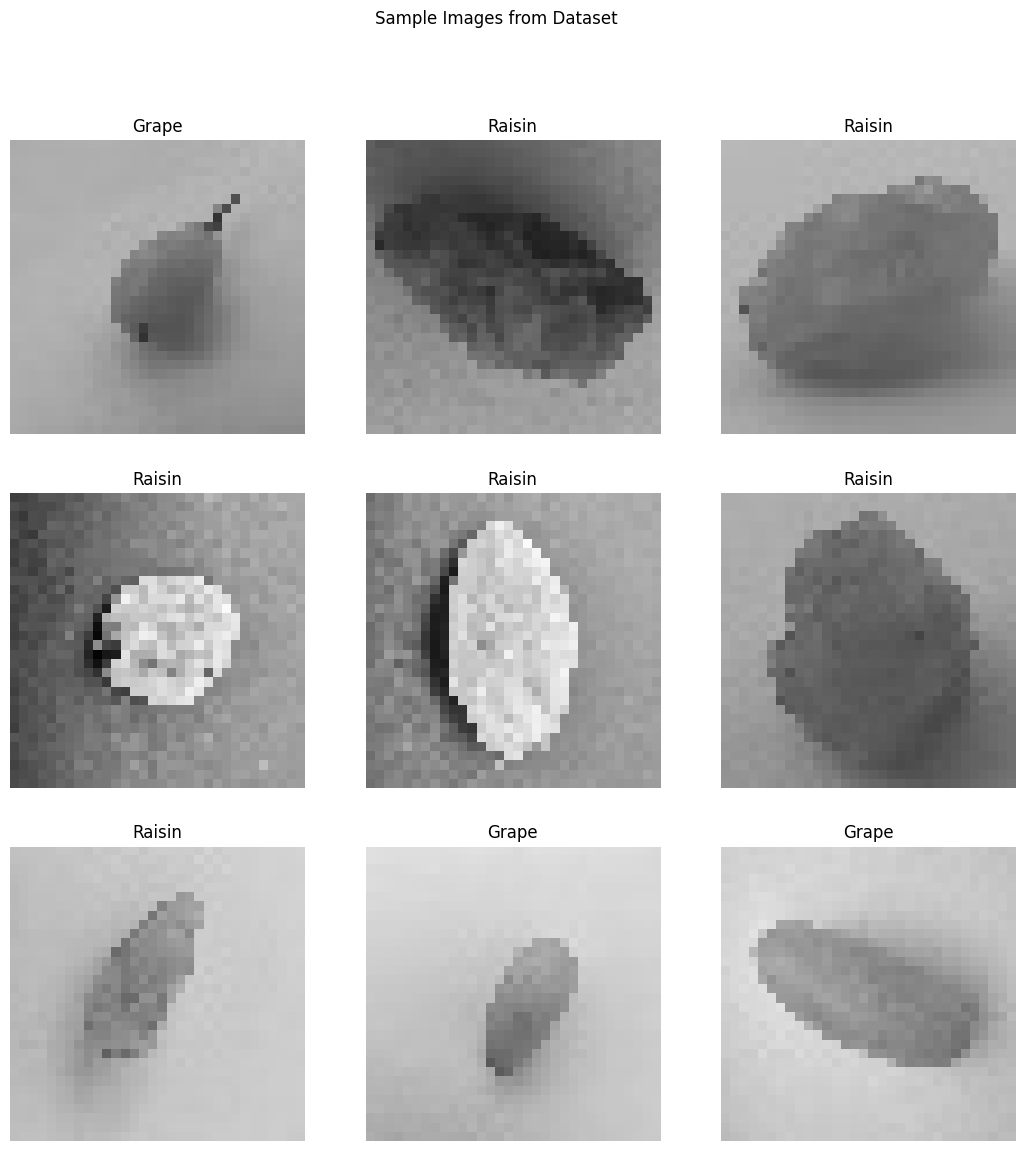

In [215]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Splitting the Dataset into Training & Test Set

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (544, 32, 32) (544,)
Validation set: (136, 32, 32) (136,)
Test set: (170, 32, 32) (170,)


### Building the Model

In [217]:
inputs = Input(shape = (32, 32, 1))
x = Conv2D(32, (3, 3), activation = "relu")(inputs)
x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_126 (Conv2D)         (None, 30, 30, 32)        320       
                                                                 
 conv2d_127 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 conv2d_129 (Conv2D)         (None, 10, 10, 64)        36928     
                                                          

In [218]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
17/17 [==============================] - 3s 62ms/step - loss: 0.6873 - accuracy: 0.5570 - val_loss: 0.6764 - val_accuracy: 0.5294
Epoch 2/20
17/17 [==============================] - 1s 46ms/step - loss: 0.6481 - accuracy: 0.6379 - val_loss: 0.6461 - val_accuracy: 0.6618
Epoch 3/20
17/17 [==============================] - 1s 52ms/step - loss: 0.5981 - accuracy: 0.6673 - val_loss: 0.6108 - val_accuracy: 0.6912
Epoch 4/20
17/17 [==============================] - 1s 46ms/step - loss: 0.5746 - accuracy: 0.6949 - val_loss: 0.5929 - val_accuracy: 0.6618
Epoch 5/20
17/17 [==============================] - 1s 43ms/step - loss: 0.5254 - accuracy: 0.7188 - val_loss: 0.5696 - val_accuracy: 0.7059
Epoch 6/20
17/17 [==============================] - 1s 41ms/step - loss: 0.4596 - accuracy: 0.7886 - val_loss: 0.4904 - val_accuracy: 0.7721
Epoch 7/20
17/17 [==============================] - 1s 44ms/step - loss: 0.3823 - accuracy: 0.8493 - val_loss: 0.5421 - val_accuracy: 0.7059
Epoch 8/20
17

### Plotting The Accuracy & Loss Graph

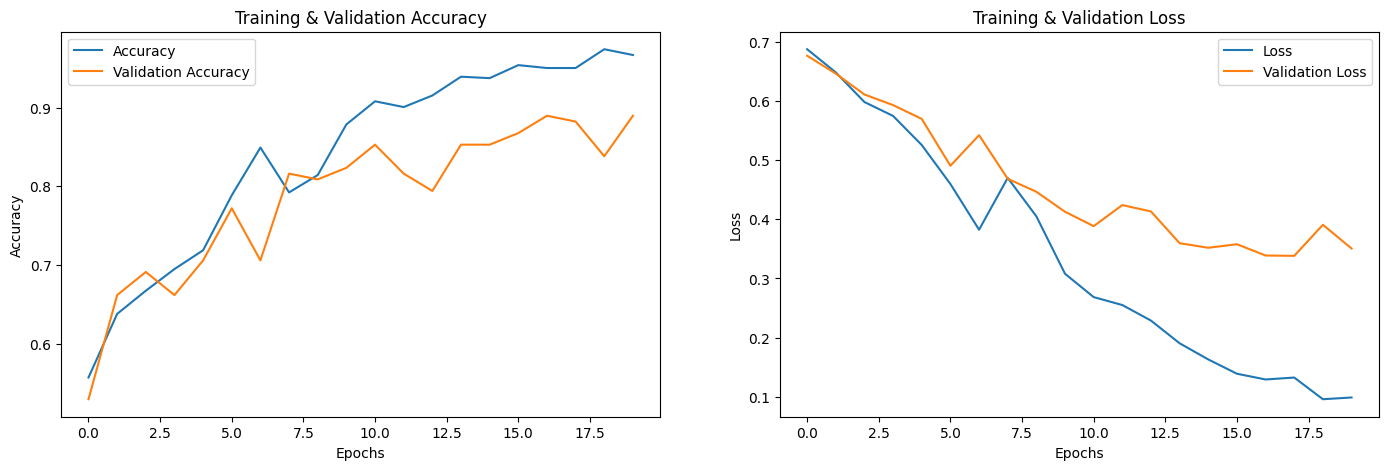

In [219]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [220]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"Test Loss: {round(test_loss * 100, 2)}%")

6/6 [==============================] - 0s 9ms/step - loss: 0.3053 - accuracy: 0.8588
Test Accuracy: 85.88%
Test Loss: 30.53%


In [ ]:
inputs = Input(shape = (32, 32, 1))
x = Flatten()(inputs)

x = Dense(128, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)

outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.00015), loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()